# Fashion MNIST
by uramoon@kw.ac.kr (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)

Fashion MNIST는 MNIST와 동일한 입출력 구조를 지니고 있으나 숫자 대신 의류의 종류를 예측합니다.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

0:	T-shirt/top
1:	Trouser
2:	Pullover
3:	Dress
4:	Coat
5:	Sandal
6:	Shirt
7:	Sneaker
8:	Bag
9:	Ankle boot

In [1]:
# 데이터셋 불러오기
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


## TODO 1: 훈련 데이터 살펴보기

1. 훈련 데이터의 처음 세 장을 그려보세요.

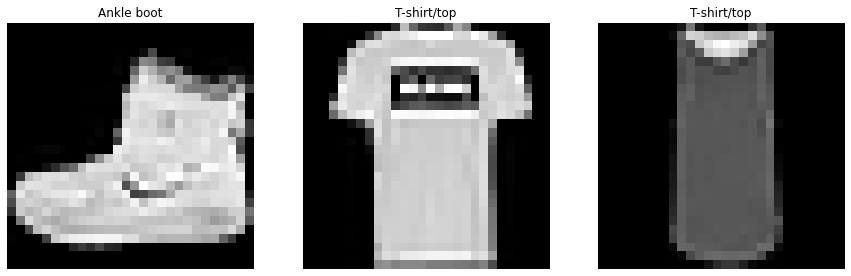

In [2]:
# TODO: 아래 빈 칸을 채우세요.
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 10))
for idx in range(3):
  plt.subplot(1, 3, idx+1)        # 행은 1개, 열은 3개, 몇 번째 그림을 그릴 것인지 기재 (1부터 시작하는 숫자)
  plt.imshow(train_images[idx], cmap='gray')  # 이미지 흑백으로 그리기
  plt.title(class_names[train_labels[idx]])                # 그림 제목으로 정답 (label)을 표시해보세요. 예: 숫자가 아닌 Shirt, Bag 등
  plt.axis('off')
plt.show()

## TODO 2: 데이터 전처리 (모양 바꾸기, 정규화, 레이블 변환)
레이블 변환은 하지 않고 TODO3의 loss에 'categorical_crossentropy' 대신 'sparse_categorical_crossentropy'를 사용해도 됩니다.

In [3]:
print("[ before preprocessing ]")
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

norm_train_images = train_images.reshape((60000, 28 * 28))      # 6만개의 일차원 배열로 재해석 (각 배열은 길이 784=28*28)
norm_train_images = norm_train_images.astype('float32') / 255   # [0, 255]의 정수를 [0, 1]의 실수로 변환

norm_test_images = test_images.reshape((10000, 28 * 28))
norm_test_images = norm_test_images.astype('float32') / 255

print("\n[ after preprocessing ]")
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

[ before preprocessing ]
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)

[ after preprocessing ]
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


## TODO 3: 모델 훈련 (모델 생성, compile, fit, evaluate)
테스트 데이터에 대해 88% 이상의 정확도를 보이는 모델을 만들어 보세요.

In [4]:
# TODO: 네트워크 만들기, loss만 써주세요.
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Input(784,)) # (784)는 784라는 정수, (784,)는 길이 784인 일차원 배열을 의미
network.add(layers.Dense(512, activation='relu')) 
network.add(layers.Dense(10, activation='softmax')) 

network.compile(optimizer='rmsprop',              
                # loss='categorical_crossentropy',  
                loss='sparse_categorical_crossentropy',  
                metrics=['accuracy'])


from keras.callbacks import EarlyStopping

network.fit(norm_train_images, train_labels, batch_size=128, epochs=10000, # 수정불가: 만 번의 epochs 전에 조기종료를 할 것입니다.
            callbacks=EarlyStopping(patience=70),                  # 검증 데이터에서의 val_loss 성능 하락을 최대 몇 번 참을지 적절하게 설정
            validation_split=0.1)                                     # 훈련 데이터에서 검증 데이터로 얼마나 사용할지 적절하게 설정

test_loss, test_acc = network.evaluate(norm_test_images, test_labels)
print(f'Test Accuracy:{test_acc * 100:.2f}%')

Epoch 1/10000
422/422 [==============================] - 10s 5ms/step - loss: 0.5696 - accuracy: 0.7984 - val_loss: 0.4027 - val_accuracy: 0.8573
Epoch 2/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.3925 - accuracy: 0.8568 - val_loss: 0.3609 - val_accuracy: 0.8662
Epoch 3/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.8724 - val_loss: 0.3655 - val_accuracy: 0.8712
Epoch 4/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.8821 - val_loss: 0.3390 - val_accuracy: 0.8793
Epoch 5/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.8893 - val_loss: 0.3220 - val_accuracy: 0.8858
Epoch 6/10000
422/422 [==============================] - 1s 3ms/step - loss: 0.2799 - accuracy: 0.8966 - val_loss: 0.3940 - val_accuracy: 0.8568
Epoch 7/10000
422/422 [==============================] - 2s 4ms/step - loss: 0.2679 - accuracy: 0.9026 - val_loss: 0.3396 - val_a

## TODO 4: 틀린 예제 확인하기
TODO 3에서 만든 모델이 잘못 분류하는 그림을 테스트 데이터에서 하나 이상 찾아 그려보세요. <br>
(원래 레이블과 모델이 예측한 레이블은 그림 제목에 표시)

313/313 [==============================] - 0s 1ms/step
(10000, 10)
[9 2 1 ... 8 1 5] (10000,)
test_image 에서 틀린 image의 갯수 :  1121


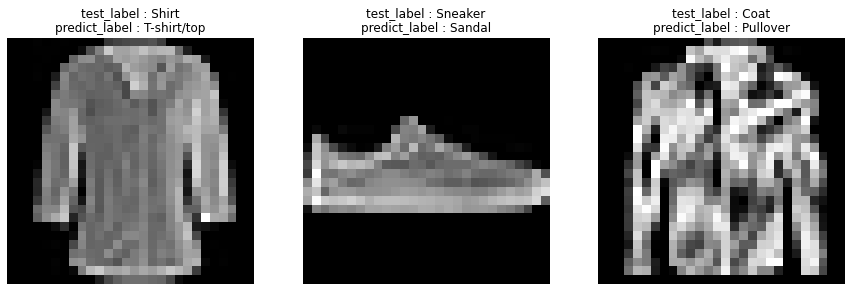

In [5]:
import numpy as np

predict = network.predict(norm_test_images)
print(predict.shape)

predict_labels = np.argmax(predict, axis=1)
print(predict_labels, predict_labels.shape)

# test image label과 predict label과 다른 image들의 index 저장
diff_about_test_images_and_predict_idxList = []

for idx in range(10000):
  if predict_labels[idx] != test_labels[idx]:
    diff_about_test_images_and_predict_idxList.append(idx)

print("test_image 에서 틀린 image의 갯수 : ", len(diff_about_test_images_and_predict_idxList))


i = 0
plt.figure(figsize=(15, 10))
for idx in diff_about_test_images_and_predict_idxList:
  if i == 3: break

  plt.subplot(1, 3, i+1)        # 행은 1개, 열은 3개, 몇 번째 그림을 그릴 것인지 기재 (1부터 시작하는 숫자)
  plt.imshow(test_images[idx], cmap='gray')  # 이미지 흑백으로 그리기
  plt.title("test_label : " + class_names[test_labels[idx]] + "\npredict_label : " + class_names[predict_labels[idx]])
  plt.axis('off')

  i = i + 1
plt.show()